# Exact Multivariate Amplitude Distributions

## Implementation Test

#### Juan Camilo Henao Londono

In [2]:
# Modules

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Gamma function
from scipy.special import gamma

# Modified Bessel function of the second kind of real order v
from scipy.special import kv

# Gauss hypergeometric function 2F1(a, b; c; z)
from scipy.special import hyp2f1

# Confluent hypergeometric function U
from scipy.special import hyperu

In [3]:
# Parameters

returns = np.arange(-10, 11, 0.01)
N = 5
Lambda = 1
K = 100
L = 55
l = 55

### Gaussian Probability Density Function

In [4]:
def gaussian_distribution(
    mean: float, variance: float, x_values: np.ndarray
) -> np.ndarray:
    """Compute the Gaussian distribution values.

    :param mean: mean of the Gaussian distribution.
    :param variance: variance of the Gaussian distribution.
    :param x_values: array of the values to compute the Gaussian
     distribution
    """

    return (1 / (2 * np.pi * variance) ** 0.5) * np.exp(
        -((x_values - mean) ** 2) / (2 * variance)
    )

In [13]:
pdf_g = gaussian_distribution(0, 1, returns)

### Algebraic Probability Density Function

In [5]:
def algebraic_distribution(
    K_value: int, l_value: int, x_values: np.ndarray
) -> np.ndarray:
    """Compute the algebraic distribution values.

    :param variance: variance of the algebraic distribution.
    :param K_value: number of companies analyzed.
    :param l_value: shape parameter.
    :param x_values: array of the values to compute the Gaussian
     distribution
    """

    m = 2 * l_value - K_value - 2

    assert m > 0

    return (
        (1 / np.sqrt(2 * np.pi))
        * (np.sqrt(2 / m))
        * (gamma(l_value - (K_value - 1) / 2) / gamma(l_value - K_value / 2))
        * (1 / (1 + (1 / m) * x_values * x_values) ** (l_value - (K_value - 1) / 2))
    )

In [12]:
x_val = np.arange(-10, 11)
print(algebraic_distribution(1, 2, x_vals))

[6.24075848e-05 9.46787288e-05 1.50679236e-04 2.54647909e-04
 4.65025400e-04 9.41745225e-04 2.20283658e-03 6.36619772e-03
 2.54647909e-02 1.59154943e-01 6.36619772e-01 1.59154943e-01
 2.54647909e-02 6.36619772e-03 2.20283658e-03 9.41745225e-04
 4.65025400e-04 2.54647909e-04 1.50679236e-04 9.46787288e-05
 6.24075848e-05]


In [14]:
pdf_a = algebraic_distribution(1, 2, returns)

### Gaussian-Gaussian Probability Density Function

In [3]:
def pdf_gaussian_gaussian(returns: np.ndarray, N: float, Lambda: float) -> np.ndarray:
    """Computes the one dimensional Gaussian-Gaussian PDF.

    :param returns: numpy array with the returns values.
    :param N: strength of the fluctuations around the mean.
    :param Lambda: variance of the returns.
    :return: numpy array with the pdf values.
    """

    first_part: np.float = 1 / (
        2 ** ((N - 1) / 2) * gamma(N / 2) * np.sqrt((np.pi * Lambda) / N)
    )
    second_part: np.ndarray = np.sqrt((N * returns ** 2) / Lambda) ** ((N - 1) / 2)
    third_part: np.ndarray = kv((1 - N) / 2, np.sqrt(N * returns ** 2) / Lambda)

    return first_part * second_part * third_part

In [4]:
pdf_gg = pdf_gaussian_gaussian(returns, N, Lambda)

### Gaussian-Algebraic Probability Density Function

In [5]:
def pdf_gaussian_algebraic(
    returns: np.ndarray, K: float, L: float, N: float, Lambda: float
) -> np.ndarray:
    """Computes de one dimensional Gaussian-Algebraic PDF.

    :param returns: numpy array with the returns values.
    :param K: number of companies.
    :param L: shape parameter.
    :param N: strength of the fluctuations around the mean.
    :param Lambda: variance of the returns.
    :return: numpy array with the pdf values.
    """

    M = 2 * L - K - N - 1

    numerator: np.float = gamma(L - (K + N) / 2 + 1) * gamma(L - (K - 1) / 2)
    denominator: np.float = (
        gamma(L - (K + N - 1) / 2) * gamma(N / 2) * np.sqrt(2 * np.pi * Lambda * M / N)
    )

    frac: np.float = numerator / denominator

    function: np.ndarray = hyperu(
        L - (K + N) / 2 + 1, (1 - N) / 2 + 1, (N * returns ** 2) / (2 * M * Lambda)
    )

    return frac * function

In [6]:
pdf_ga = pdf_gaussian_algebraic(returns, K, L, N, Lambda)

### Algebraic-Gaussian Probability Density Function

In [7]:
def pdf_algebraic_gaussian(
    returns: np.ndarray, K: float, l: float, N: float, Lambda: float
) -> np.ndarray:
    """Computes de one dimensional Algebraic-Gaussian PDF.

    :param returns: numpy array with the returns values.
    :param K: number of companies.
    :param l: shape parameter.
    :param N: strength of the fluctuations around the mean.
    :param Lambda: variance of the returns.
    :return: numpy array with the pdf values.
    """

    m = 2 * l - K - 2

    numerator: np.float = gamma(l - (K - 1) / 2) * gamma(l - (K - N) / 2)
    denominator: np.float = (
        gamma(l - K / 2) * gamma(N / 2) * np.sqrt(2 * np.pi * Lambda * m / N)
    )

    frac: np.float = numerator / denominator

    function: np.ndarray = hyperu(
        l - (K - 1) / 2, (1 - N) / 2 + 1, (N * returns ** 2) / (2 * m * Lambda)
    )

    return frac * function

In [8]:
pdf_ag = pdf_algebraic_gaussian(returns, K, l, N, Lambda)

### Algebraic-Algebraic Probability Density Function

In [9]:
def pdf_algebraic_algebraic(
    returns: np.ndarray, K: float, L: float, l: float, N: float, Lambda: float
) -> np.ndarray:
    """Computes de one dimensional Algebraic-Algebraic PDF.

    :param returns: numpy array with the returns values.
    :param K: number of companies.
    :param L: shape parameter.
    :param l: shape parameter.
    :param N: strength of the fluctuations around the mean.
    :param Lambda: variance of the returns.
    :return: numpy array with the pdf values.
    """

    M = 2 * L - K - N - 1
    m = 2 * l - K - 2

    numerator: np.float = (
        gamma(l - (K - 1) / 2)
        * gamma(l - (K - N) / 2)
        * gamma(L - (K - 1) / 2)
        * gamma(L - (K + N) / 2 + 1)
    )
    denominator: np.float = (
        np.sqrt(np.pi * Lambda * M * m / N)
        * gamma(l - K / 2)
        * gamma(L + l - (K - 1))
        * gamma(L - (K + N - 1) / 2)
        * gamma(N / 2)
    )

    frac: np.float = numerator / denominator

    function: np.ndarray = hyp2f1(
        l - (K - 1) / 2,
        L - (K + N) / 2 + 1,
        L + l - (K - 1),
        1 - (N * returns ** 2) / (M * m * Lambda),
    )

    return frac * function

In [10]:
pdf_aa = pdf_algebraic_algebraic(returns, K, L, l, N, Lambda)

### Plots

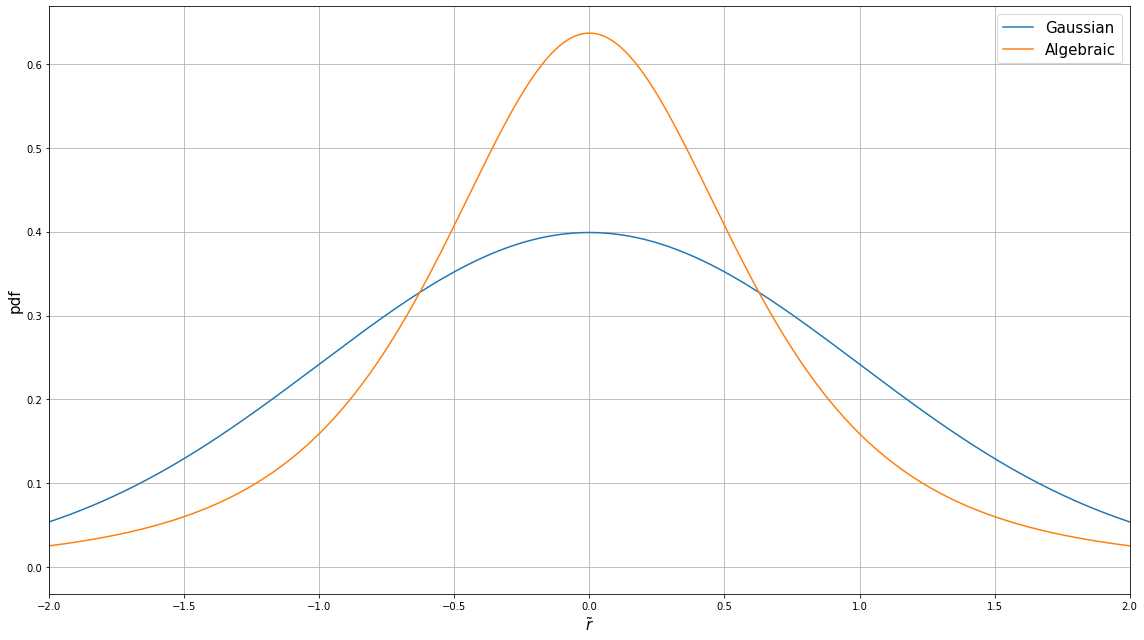

In [15]:
plt.figure(figsize=(16, 9))

plt.plot(returns, pdf_g, "-", label="Gaussian")
plt.plot(returns, pdf_a, "-", label="Algebraic")

plt.legend(fontsize=15)
plt.xlim(-2, 2)
plt.xlabel(r"$\tilde{r}$", fontsize=15)
plt.ylabel("pdf", fontsize=15)
plt.grid(True)
plt.tight_layout()

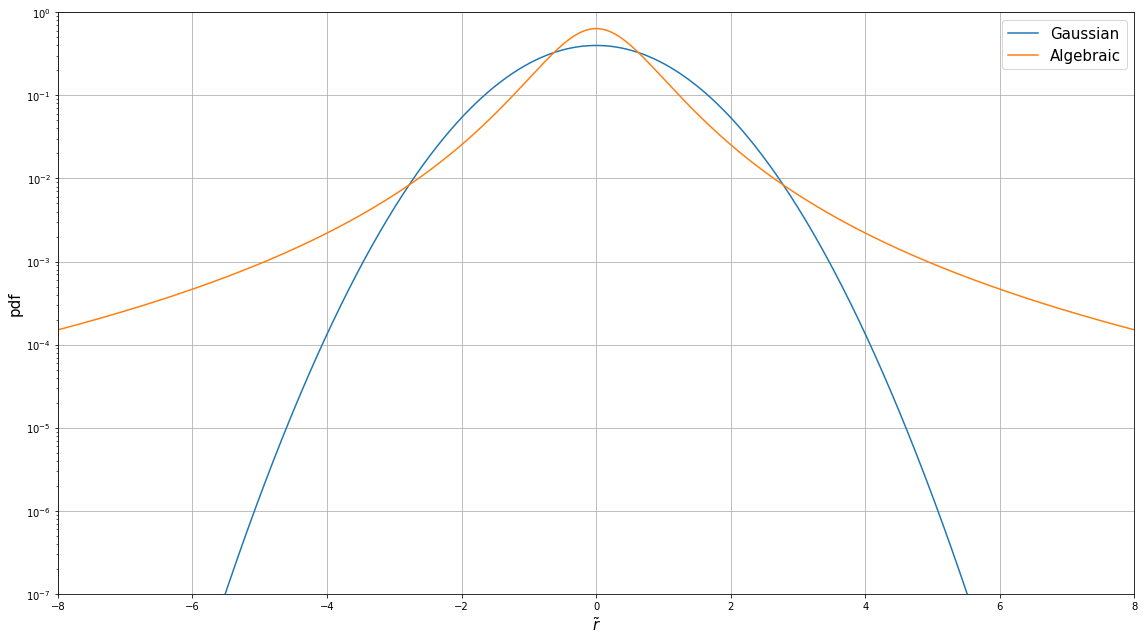

In [16]:
plt.figure(figsize=(16, 9))

plt.semilogy(returns, pdf_g, "-", label="Gaussian")
plt.semilogy(returns, pdf_a, "-", label="Algebraic")

plt.legend(fontsize=15)
plt.xlim(-8, 8)
plt.ylim(10 ** -7, 1)
plt.xlabel(r"$\tilde{r}$", fontsize=15)
plt.ylabel("pdf", fontsize=15)
plt.grid(True)
plt.tight_layout()

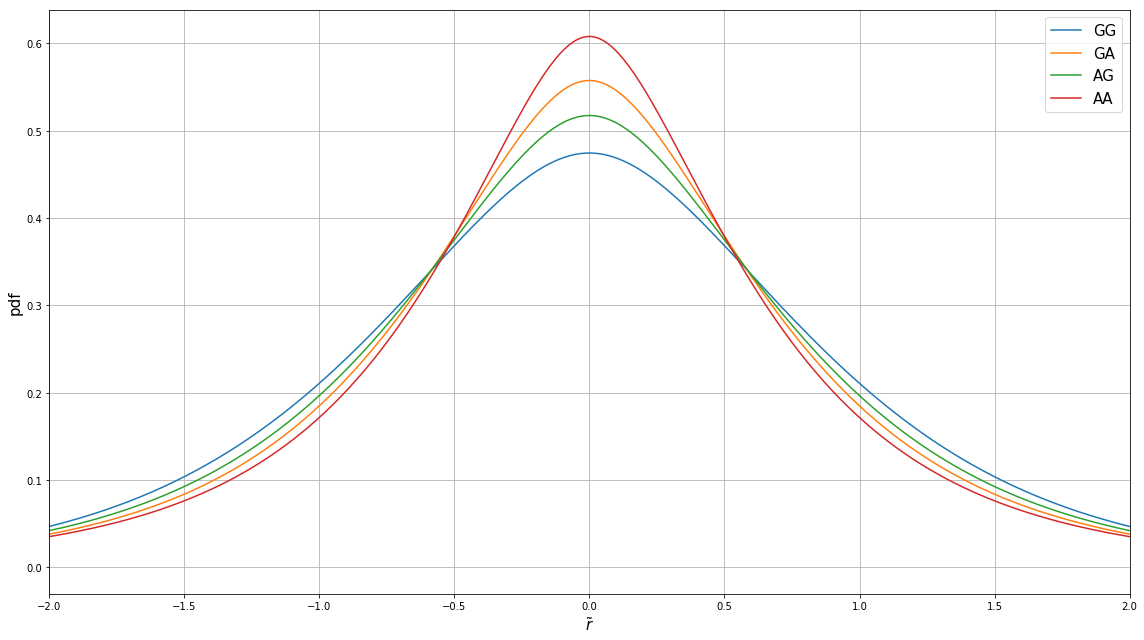

In [16]:
plt.figure(figsize=(16, 9))

plt.plot(returns, pdf_gg, "-", label="GG")
plt.plot(returns, pdf_ga, "-", label="GA")
plt.plot(returns, pdf_ag, "-", label="AG")
plt.plot(returns, pdf_aa, "-", label="AA")

plt.legend(fontsize=15)
plt.xlim(-2, 2)
plt.xlabel(r"$\tilde{r}$", fontsize=15)
plt.ylabel("pdf", fontsize=15)
plt.grid(True)
plt.tight_layout()

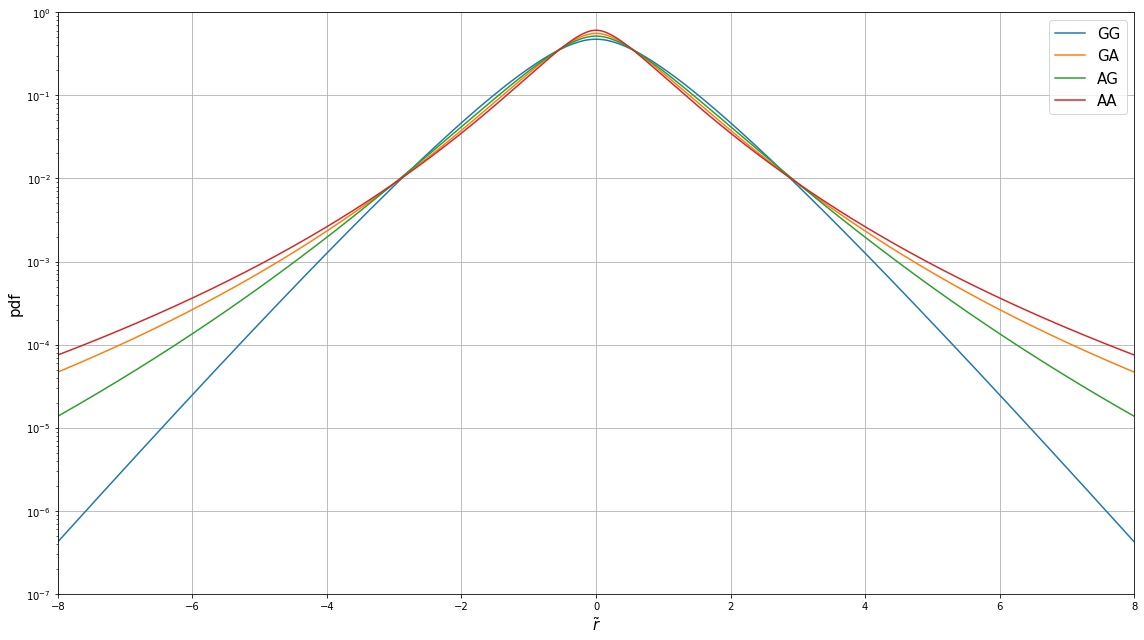

In [21]:
plt.figure(figsize=(16, 9))

plt.semilogy(returns, pdf_gg, "-", label="GG")
plt.semilogy(returns, pdf_ga, "-", label="GA")
plt.semilogy(returns, pdf_ag, "-", label="AG")
plt.semilogy(returns, pdf_aa, "-", label="AA")

plt.legend(fontsize=15)
plt.xlim(-8, 8)
plt.ylim(10 ** -7, 1)
plt.xlabel(r"$\tilde{r}$", fontsize=15)
plt.ylabel("pdf", fontsize=15)
plt.grid(True)
plt.tight_layout()